In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

In [42]:
os.chdir("..")
data = pd.read_csv('data+labels/mushrooms.csv')
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data+labels/mushrooms.csv'

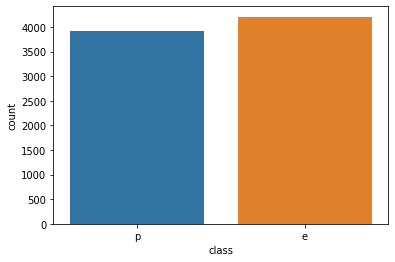

In [3]:
x = data['class']

ax = sns.countplot(x=x, data=data)

In [4]:
def data_plot(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11, 8)})
        ax = sns.countplot(x=data[col],hue=hue,data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


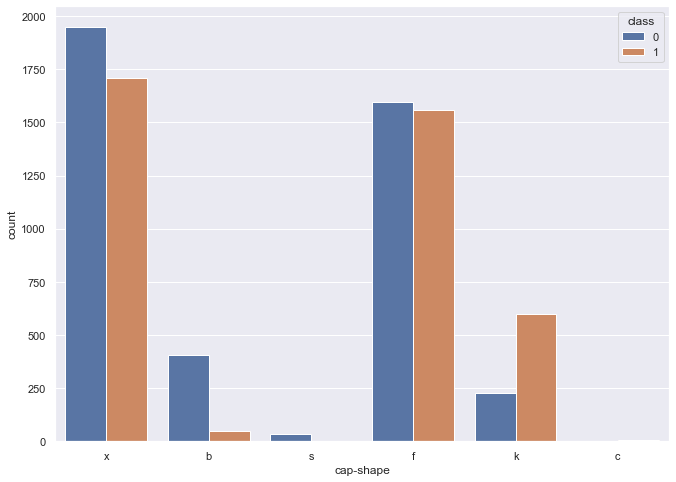

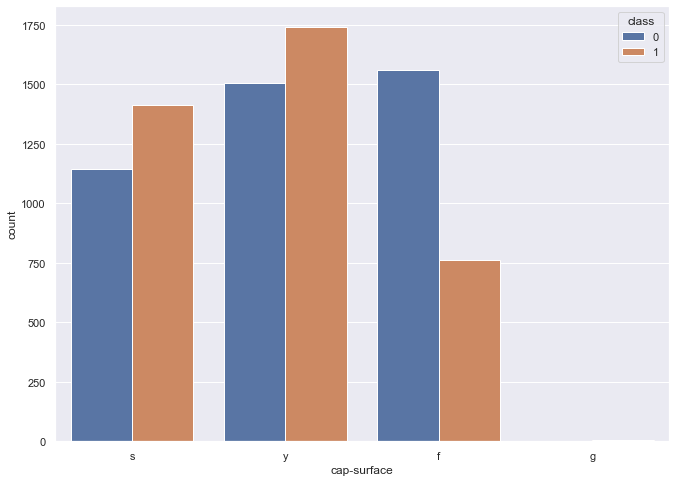

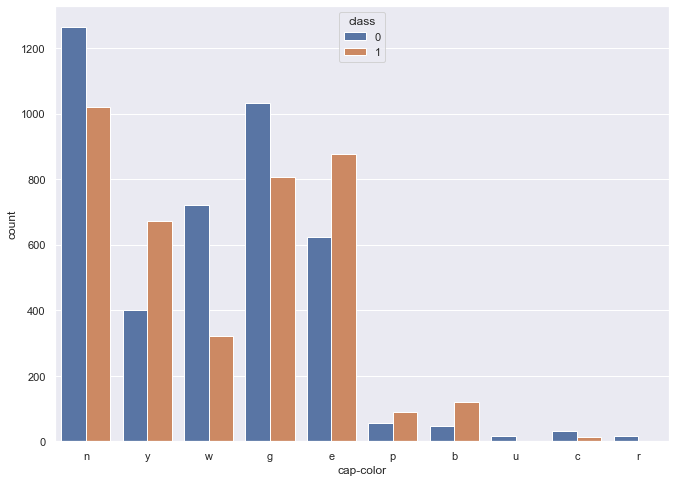

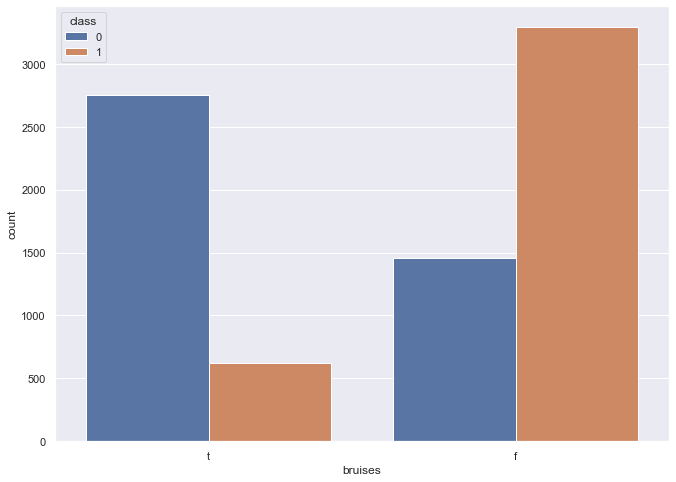

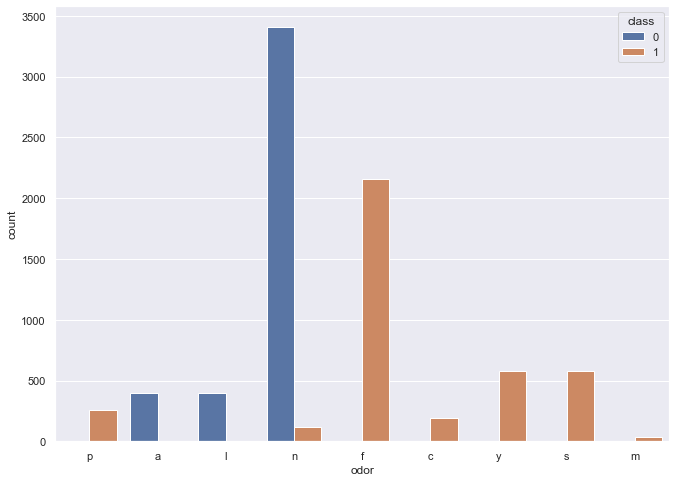

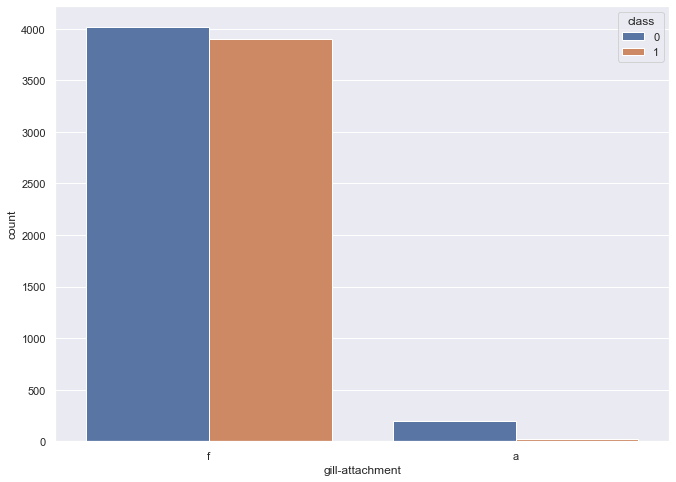

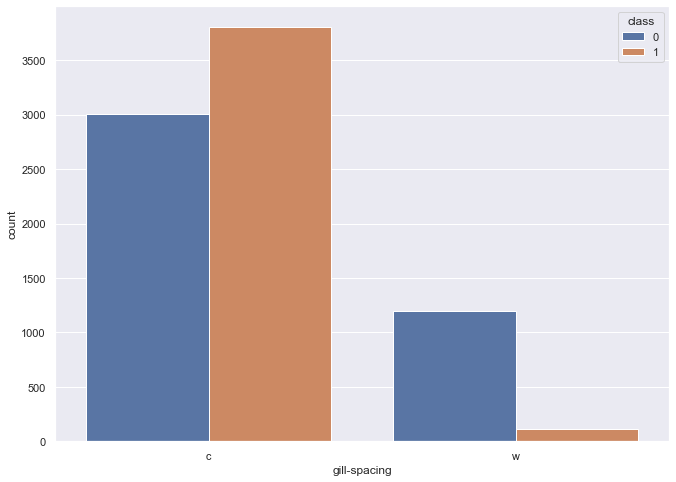

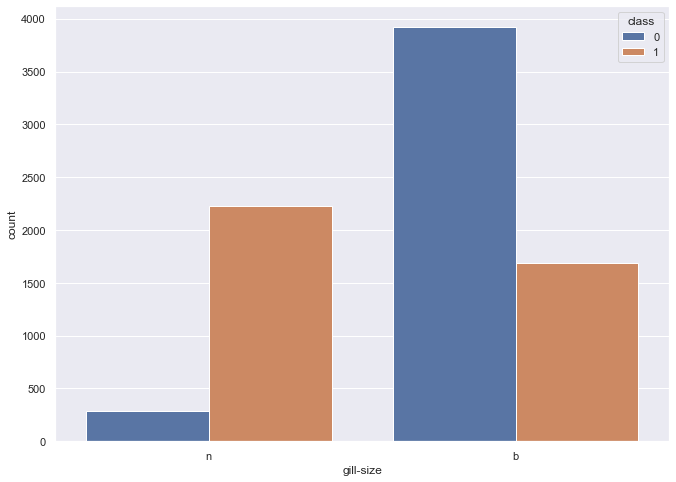

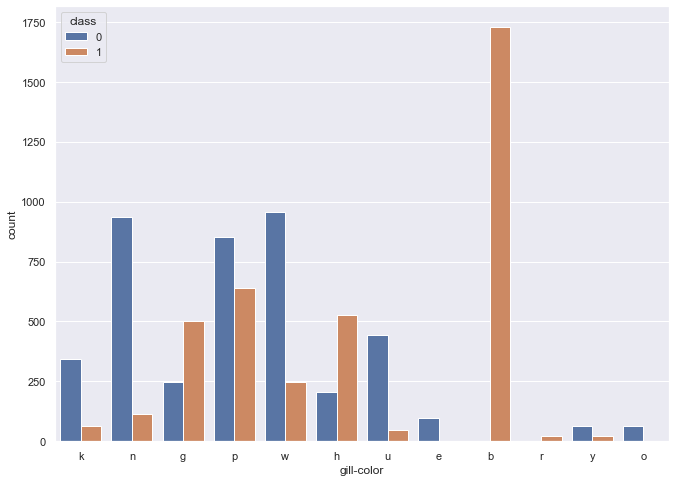

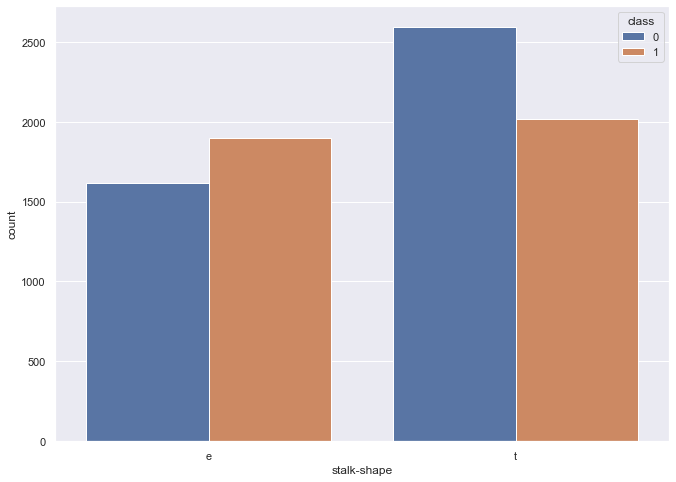

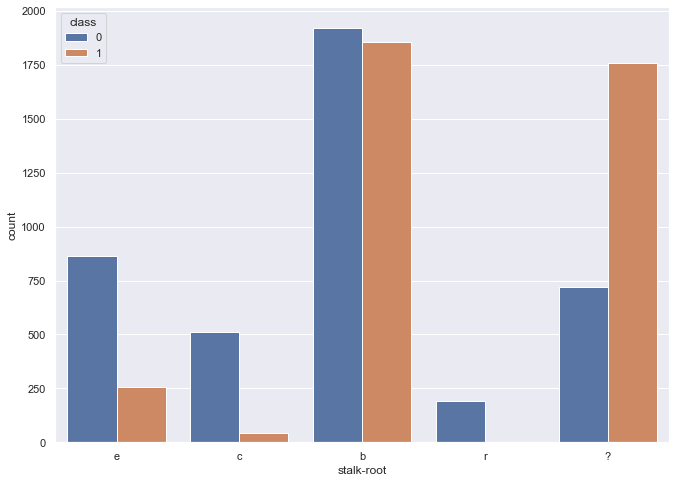

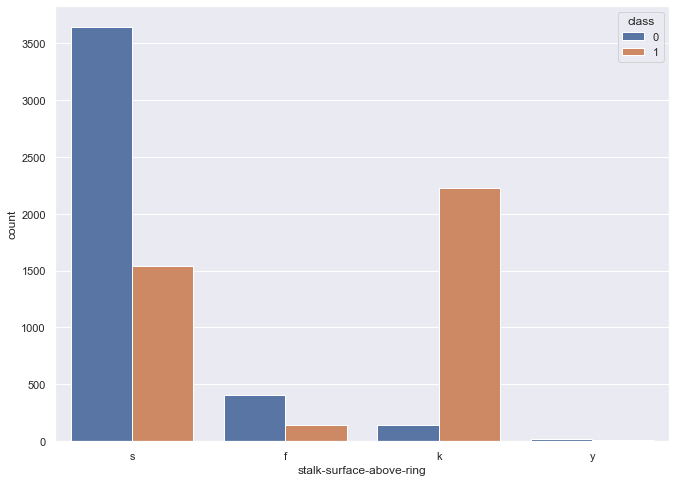

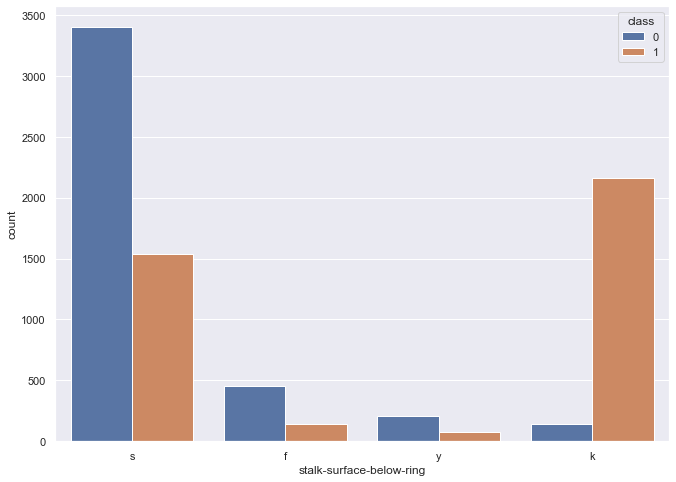

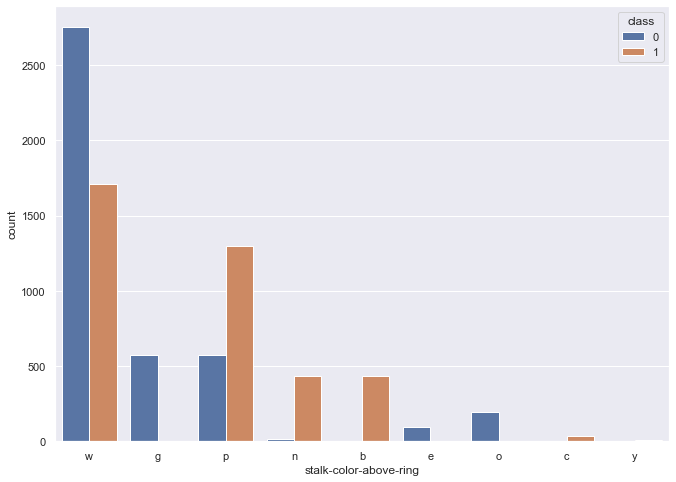

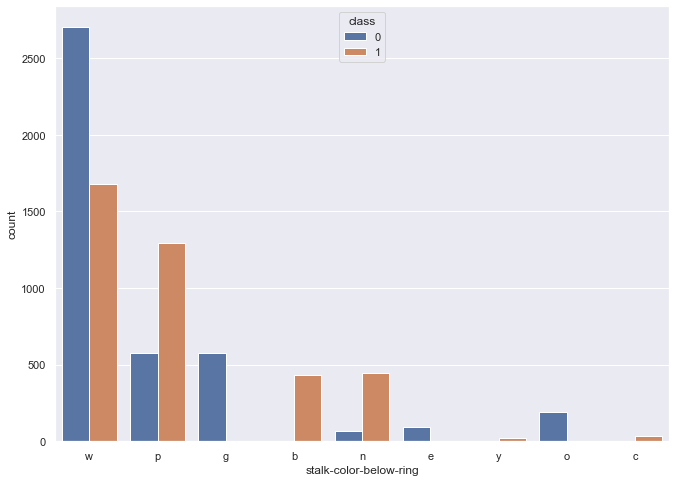

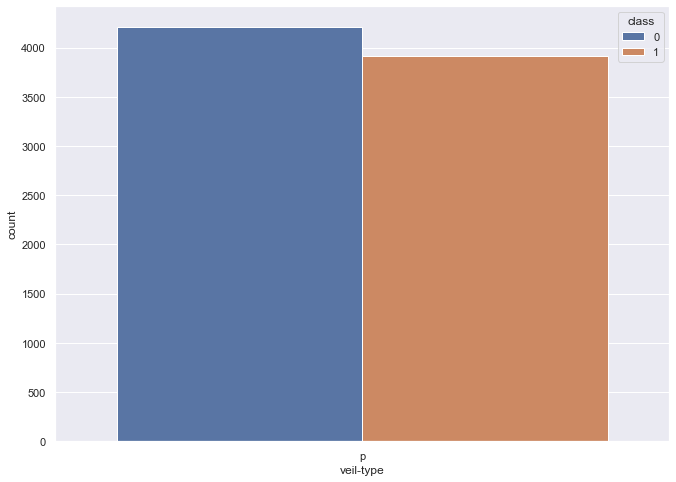

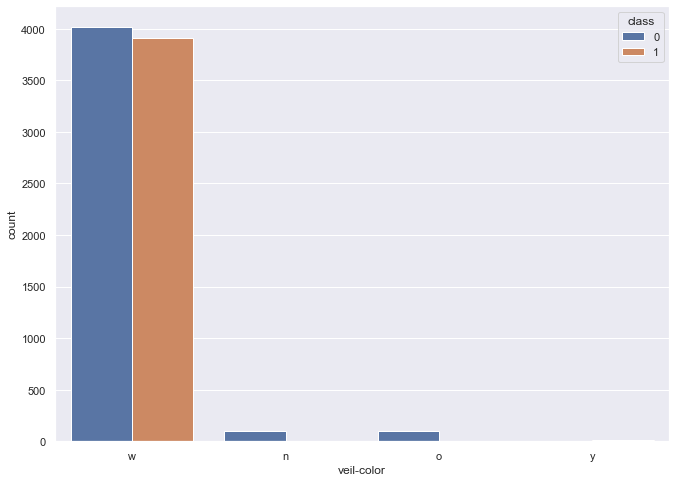

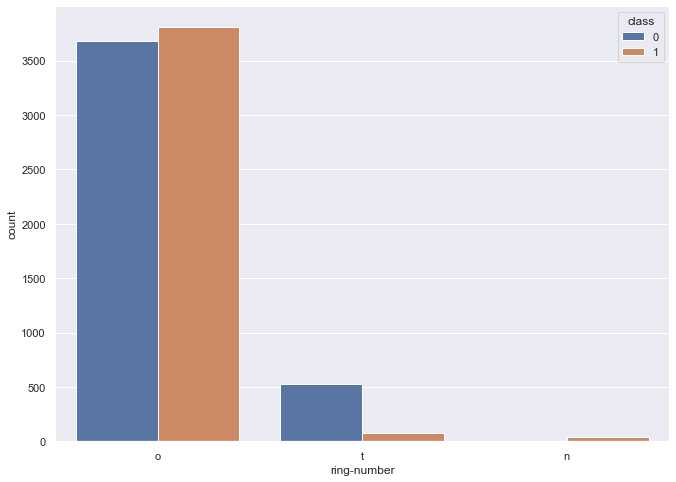

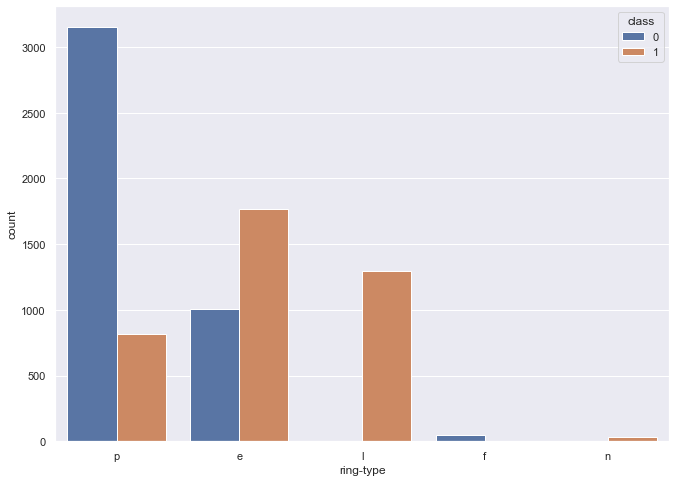

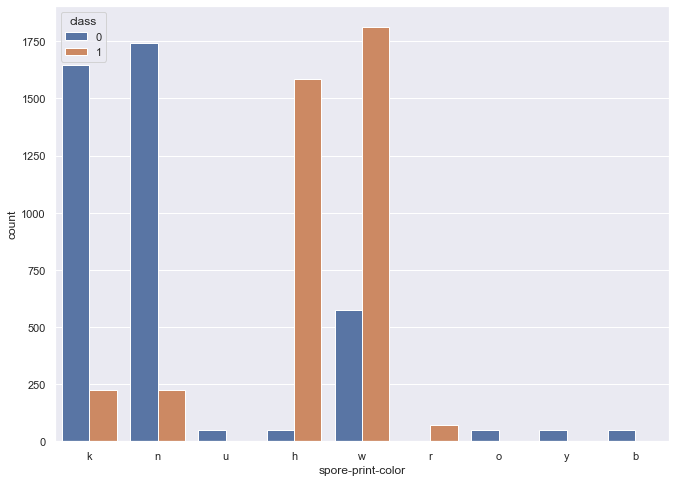

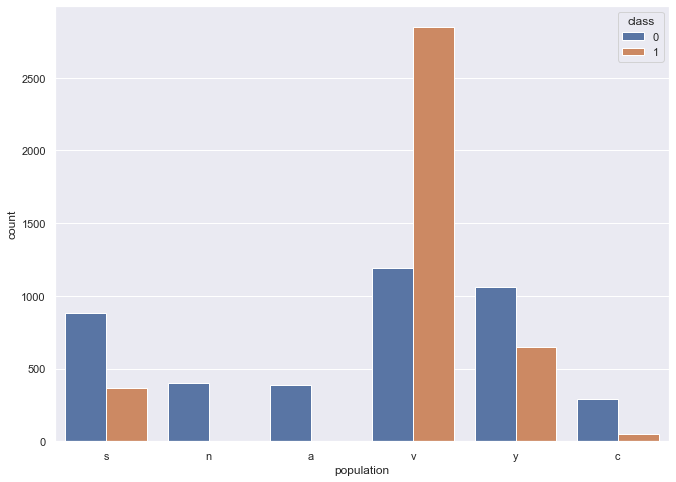

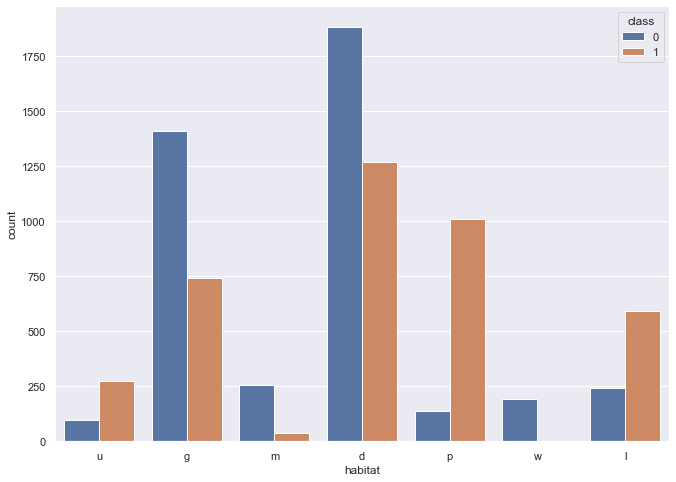

In [38]:
hue = data['class']
data_for_plot = data.drop('class',1)

data_plot(hue, data_for_plot)


In [6]:
#Checking for missing values

for col in data.columns:
    print("{} : {}".format(col,data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [7]:
#Let's get ready for medelling with a label encoder

le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
#get_dummies to the rest of the features

encoded_data = pd.get_dummies(data)

encoded_data.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#Breaking our dataset into training & test

from sklearn.model_selection import train_test_split

y = data['class'].values.reshape(-1,1)
X = encoded_data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [10]:
#Let's first look at how logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [11]:
lg = LogisticRegression()

lg.fit(X_train, y_train.ravel())

LogisticRegression()

In [12]:
#confusion matrix
y_prob = lg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>0.5,1,0)
cm = metrics.confusion_matrix(y_test,y_pred)

cm

array([[843,   0],
       [  0, 782]], dtype=int64)

In [13]:
#ROC Curve

auc_roc = metrics.roc_auc_score(y_test,y_pred)

auc_roc

1.0

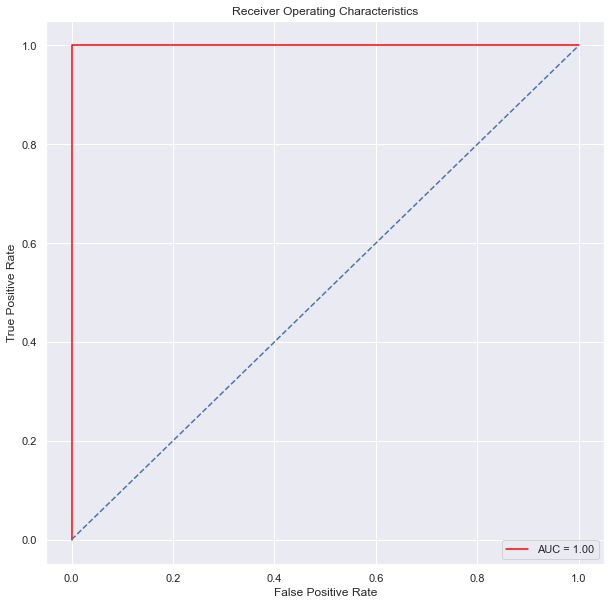

In [14]:
#making our own function to visualize ROC curve

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title("Receiver Operating Characteristics")
    plt.plot(false_positive_rate,true_positive_rate, color='red',label= 'AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plot_roc(roc_auc)

In [26]:
# Import
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [27]:
mushroom = pd.read_csv('data+labels/mushrooms.csv', header=0)
mushroom.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [28]:
# Checking Missing value
def Missing_table(df):
    # null_val = df.isnull().sum()
    null_val = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)
    percent = 100 * null_val/len(df)
    na_col_list = df.isnull().sum()[df.isnull().sum()>0].index.tolist() # 欠損を含むカラムをリスト化
    list_type = df[na_col_list].dtypes.sort_values(ascending=False) #データ型
    Missing_table = pd.concat([null_val, percent, list_type], axis = 1)
    missing_table_len = Missing_table.rename(
    columns = {0:'null', 1:'percent', 2:'type'})
    return missing_table_len.sort_values(by=['null'], ascending=False)

Missing_table(mushroom)

,null,percent,type


In [29]:
mushroom['class'].value_counts()

# Replacing some str datas to int
mushroom['class'] = mushroom['class'].replace("e",0).replace("p",1)

In [30]:
# Creating Dummy Variables
capshape = pd.get_dummies(mushroom['cap-shape'])
capsurface = pd.get_dummies(mushroom['cap-surface'])
capcolor = pd.get_dummies(mushroom['cap-color'])
bruise = pd.get_dummies(mushroom['bruises'])
gillattachment = pd.get_dummies(mushroom['gill-attachment'])
odo = pd.get_dummies(mushroom['odor'])
gillspacing = pd.get_dummies(mushroom['gill-spacing'])
gillsize = pd.get_dummies(mushroom['gill-size'])
gillcolor = pd.get_dummies(mushroom['gill-color'])
stalkshape = pd.get_dummies(mushroom['stalk-shape'])
stalkroot = pd.get_dummies(mushroom['stalk-root'])
stalksurfaceabovering = pd.get_dummies(mushroom['stalk-surface-above-ring'])
stalksurfacebelowring = pd.get_dummies(mushroom['stalk-surface-below-ring'])
stalkcolorabovering = pd.get_dummies(mushroom['stalk-color-above-ring'])
stalkcolorbelowring = pd.get_dummies(mushroom['stalk-color-below-ring'])
veiltype = pd.get_dummies(mushroom['veil-type'])
veilcolor = pd.get_dummies(mushroom['veil-color'])
ringnumber = pd.get_dummies(mushroom['ring-number'])
ringtype = pd.get_dummies(mushroom['ring-type'])
sporeprintcolor = pd.get_dummies(mushroom['spore-print-color'])
populations = pd.get_dummies(mushroom['population'])
habitats = pd.get_dummies(mushroom['habitat'])

In [31]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [32]:
# Combining all of Dummy Variables
total_mushroom = pd.concat([capshape, capsurface, capcolor, bruise, odo, gillattachment, gillspacing,gillsize, gillcolor, stalkshape, stalkroot, stalksurfaceabovering, stalksurfacebelowring, stalkcolorabovering, stalkcolorbelowring, veiltype, veilcolor, ringnumber, ringtype, sporeprintcolor, populations, habitats], axis=1)

In [33]:
# Splitting data arrays into train, test
train_feature = total_mushroom
train_target = mushroom['class']

X_train, X_test, y_train, y_test = train_test_split(train_feature, train_target, test_size=0.2, random_state=0, shuffle=True)

In [36]:
# Logistic==============

clf = LogisticRegression(solver="lbfgs")
clf.fit(X_train,y_train)
print('='*20)
print('LogisitcRegression')
print(f'accuracy of train set: {clf.score(X_train, y_train)}')
print(f'accuracy of test set: {clf.score(X_test, y_test)}')


# k-NN ==============

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print('='*20)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_train, y_train)}')
print(f'accuracy of test set: {knn.score(X_test, y_test)}')


# SVC==============

svc = SVC(verbose=True, random_state=0)
svc.fit(X_train, y_train)
print('='*20)
print('SVC')
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of test set: {svc.score(X_test, y_test)}')








LogisitcRegression
accuracy of train set: 1.0
accuracy of test set: 1.0
KNeighborsClassifier
accuracy of train set: 1.0
accuracy of test set: 1.0
[LibSVM]====================
SVC
accuracy of train set: 1.0
accuracy of test set: 1.0
